In [2]:
 import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [14]:
df = pd.read_csv("dog_breeds.csv")
print(df.head())

                Breed  Price (USD)  Population (USA)  Weight (kg)  \
0  Labrador Retriever         1428            483696           12   
1     German Shepherd         1492            313994           31   
2    Golden Retriever         2505            274184           49   
3      French Bulldog         1584            798137           19   
4             Bulldog         2956            502887            9   

   Height (cm)  Life Expectancy (years)  
0           76                       11  
1           67                        8  
2           53                        8  
3           78                       11  
4           36                        8  


In [4]:
print("Null values per column:\n", df.isnull().sum())
df_cleaned = df.dropna()
print("Cleaned Data:", len(df_cleaned))

Null values per column:
 Breed                      0
Price (USD)                0
Population (USA)           0
Weight (kg)                0
Height (cm)                0
Life Expectancy (years)    0
dtype: int64
Cleaned Data: 100


In [5]:
print(f"\nDataset contains {len(df_cleaned)} data points after cleaning.")
assert len(df_cleaned) >= 100, "Dataset does not contain at least 100 data points."


Dataset contains 100 data points after cleaning.


In [6]:
prices = df_cleaned["Price (USD)"].to_numpy()
weights = df_cleaned["Weight (kg)"].to_numpy()
heights = df_cleaned["Height (cm)"].to_numpy()
populations = df_cleaned["Population (USA)"].to_numpy()
life_exp = df_cleaned["Life Expectancy (years)"].to_numpy()

In [7]:
mean_price = np.mean(prices)
median_weight = np.median(weights)
std_height = np.std(heights)
price_weight_corr = np.corrcoef(prices, weights)[0, 1]
max_population = np.max(populations)

print(f"\nNumPy Operations:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Weight: {median_weight:.2f} kg")
print(f"Std Dev Height: {std_height:.2f} cm")
print(f"Correlation Price & Weight: {price_weight_corr:.2f}")
print(f"Max Population: {max_population}")


NumPy Operations:
Mean Price: 1959.03
Median Weight: 20.00 kg
Std Dev Height: 17.59 cm
Correlation Price & Weight: 0.44
Max Population: 859376


In [8]:
correlation_matrix = df_cleaned[['Price (USD)', 'Weight (kg)','Height (cm)','Population (USA)']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                   Price (USD)  Weight (kg)  Height (cm)  Population (USA)
Price (USD)          1.000000     0.439301     0.206658         -0.174072
Weight (kg)          0.439301     1.000000     0.566613          0.131395
Height (cm)          0.206658     0.566613     1.000000          0.162540
Population (USA)    -0.174072     0.131395     0.162540          1.000000


In [9]:
spearman_corr, spearman_p = stats.spearmanr(heights, life_exp)
print(f"\nSciPy Operation:")
print(f"Spearman correlation between Height and Life Expectancy: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")


SciPy Operation:
Spearman correlation between Height and Life Expectancy: -0.45, p-value: 0.0000


In [10]:
X = df_cleaned[["Weight (kg)", "Height (cm)"]]
X = sm.add_constant(X)
y = df_cleaned["Life Expectancy (years)"]
model = sm.OLS(y, X).fit()
print(f"\nStatsmodels Linear Regression Results:")
print(model.summary())


Statsmodels Linear Regression Results:
                               OLS Regression Results                              
Dep. Variable:     Life Expectancy (years)   R-squared:                       0.333
Model:                                 OLS   Adj. R-squared:                  0.319
Method:                      Least Squares   F-statistic:                     24.16
Date:                     Thu, 29 May 2025   Prob (F-statistic):           3.05e-09
Time:                             23:05:11   Log-Likelihood:                -191.90
No. Observations:                      100   AIC:                             389.8
Df Residuals:                           97   BIC:                             397.6
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Text(0, 0.5, 'Count')

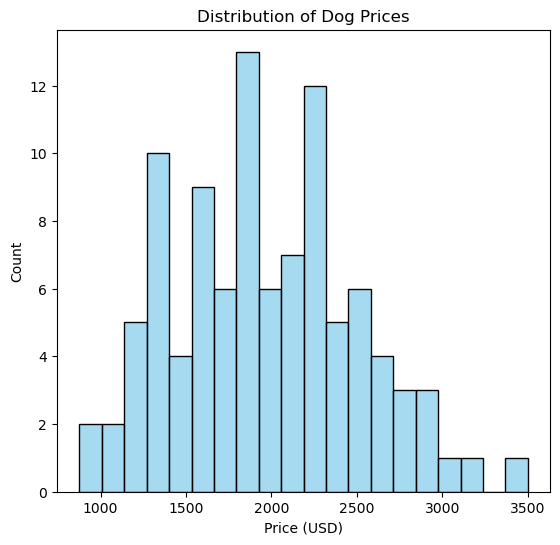

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(prices, bins=20, color='skyblue')
plt.title('Distribution of Dog Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

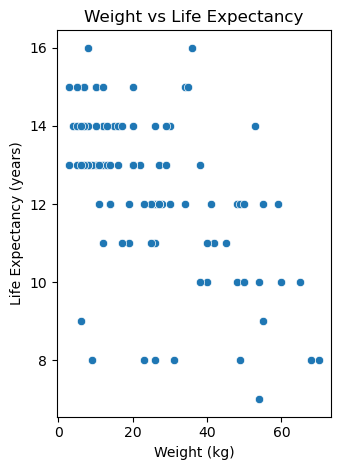

In [12]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=weights, y=life_exp)
plt.title('Weight vs Life Expectancy')
plt.xlabel('Weight (kg)')
plt.ylabel('Life Expectancy (years)')

plt.tight_layout()
plt.show()


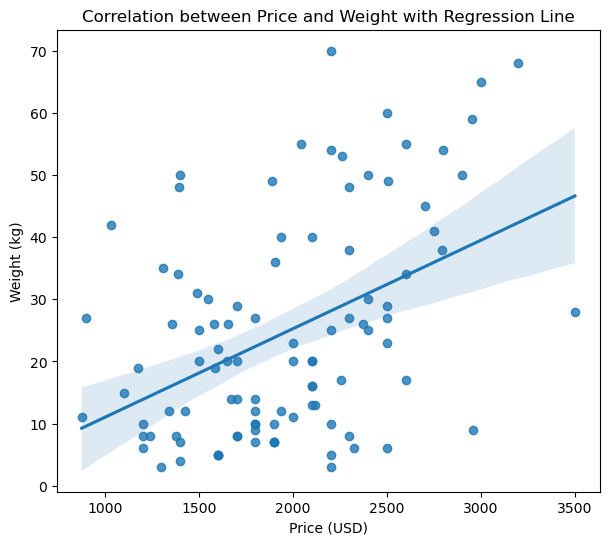

In [13]:
plt.figure(figsize=(7,6))
sns.regplot(x=prices, y=weights)
plt.title('Correlation between Price and Weight with Regression Line')
plt.xlabel('Price (USD)')
plt.ylabel('Weight (kg)')
plt.show()